<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Capstone Project <br> Notebook_3  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [33]:
df = pd.read_csv('data1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.000000,Yes,Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.000000,No,Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,82.086412,No,Medium,Town,Professional,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.000000,No,Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.000000,No,Highest,Other,Professional,Yes


In [34]:
df.reset_index(inplace=True, drop=True)

### Split the dependent and independent variables

In [35]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

In [36]:
df_target.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [37]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0 

In [38]:
df_target = df_target.astype(int)

In [39]:
df_target.value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

## Distribution of dependent variable.

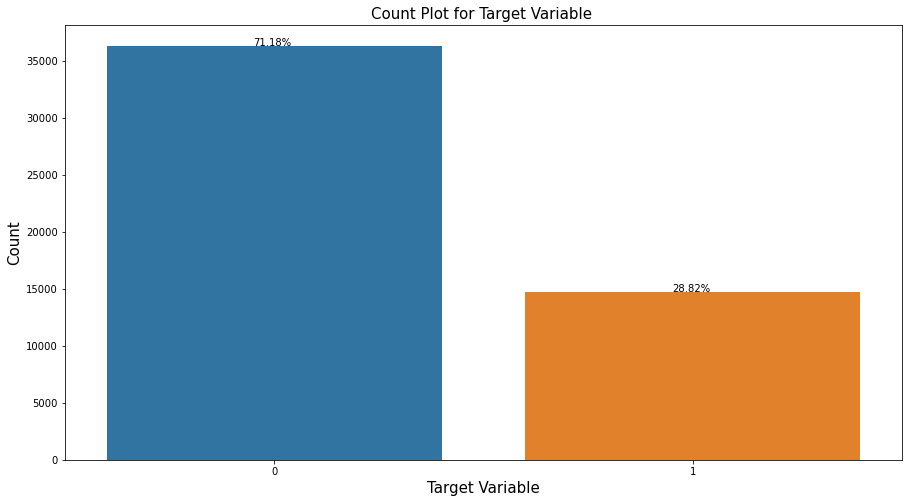

In [40]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable ', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

## Filter numerical and categorical variables.

In [41]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
num_f = df_features.select_dtypes(include=[np.number])

# display numerical features
num_f.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'HandsetPrice'],
      dtype='object')

In [42]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
cat_f = df_features.select_dtypes(exclude=[np.number])

# display categorical features
cat_f.columns

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

## Encoding the Categorical Variables

In [43]:
cat=df_features.select_dtypes(include='object').columns
cat

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_f[cat]=enc.fit_transform(cat_f[cat])

In [45]:
cat_f.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000


In [46]:
cat_f.shape

(51047, 20)

## POWER TRANSFORMATION

As our data has both positive and negative values, we have used `yeo-johnson` power Transformation as it works for both.

In [47]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in num_f.columns:
    num_f[i]=PT.fit_transform(num_f[[i]])

In [48]:
num_f.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-1.082369,-0.421751,-1.115167,-0.046949,-0.997358,-0.624205,-0.568422,-0.452641,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806202,1.119147,0.104248,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.451473
1,-1.544529,-1.929925,-1.432596,-0.913645,-0.997358,-0.624205,0.019778,0.088431,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806202,-0.767323,3.032275,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.451473
2,-0.418867,-1.990079,-0.274582,-0.913645,-0.997358,-0.624205,0.027546,0.088431,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850981,-0.767323,3.588786,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,0.096055
3,0.825055,1.394624,1.183628,1.168135,-0.997358,-0.624205,0.657477,0.284972,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895777,1.700439,0.461886,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.329307
4,-1.533157,-2.456462,-1.432596,-0.913645,-0.997358,-0.624205,0.035335,0.083232,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593759,1.552447,1.617266,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.329307


In [49]:
num_f.shape

(51047, 35)

#### Concatenate scaled numerical and dummy encoded categorical variables

In [50]:
df_features = pd.concat([cat_f,num_f], axis =1)
df_features.shape

(51047, 55)

In [51]:
df_features.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-1.082369,-0.421751,-1.115167,-0.046949,-0.997358,-0.624205,-0.568422,-0.452641,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806202,1.119147,0.104248,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.451473
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,-1.544529,-1.929925,-1.432596,-0.913645,-0.997358,-0.624205,0.019778,0.088431,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806202,-0.767323,3.032275,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.451473
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,-0.418867,-1.990079,-0.274582,-0.913645,-0.997358,-0.624205,0.027546,0.088431,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850981,-0.767323,3.588786,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,0.096055
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.825055,1.394624,1.183628,1.168135,-0.997358,-0.624205,0.657477,0.284972,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895777,1.700439,0.461886,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.329307
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-1.533157,-2.456462,-1.432596,-0.913645,-0.997358,-0.624205,0.035335,0.083232,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593759,1.552447,1.617266,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.329307


In [52]:
df_target.nunique()

2

## Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set.

In [53]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35732, 55)
y_train:  (35732,)
x_test:  (15315, 55)
y_test:  (15315,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [54]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [55]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [56]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

#### Build a full decision tree model on a train dataset using 'gini'.

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_train, y_train)

In [58]:
decision_tree.score(x_train,y_train)

1.0

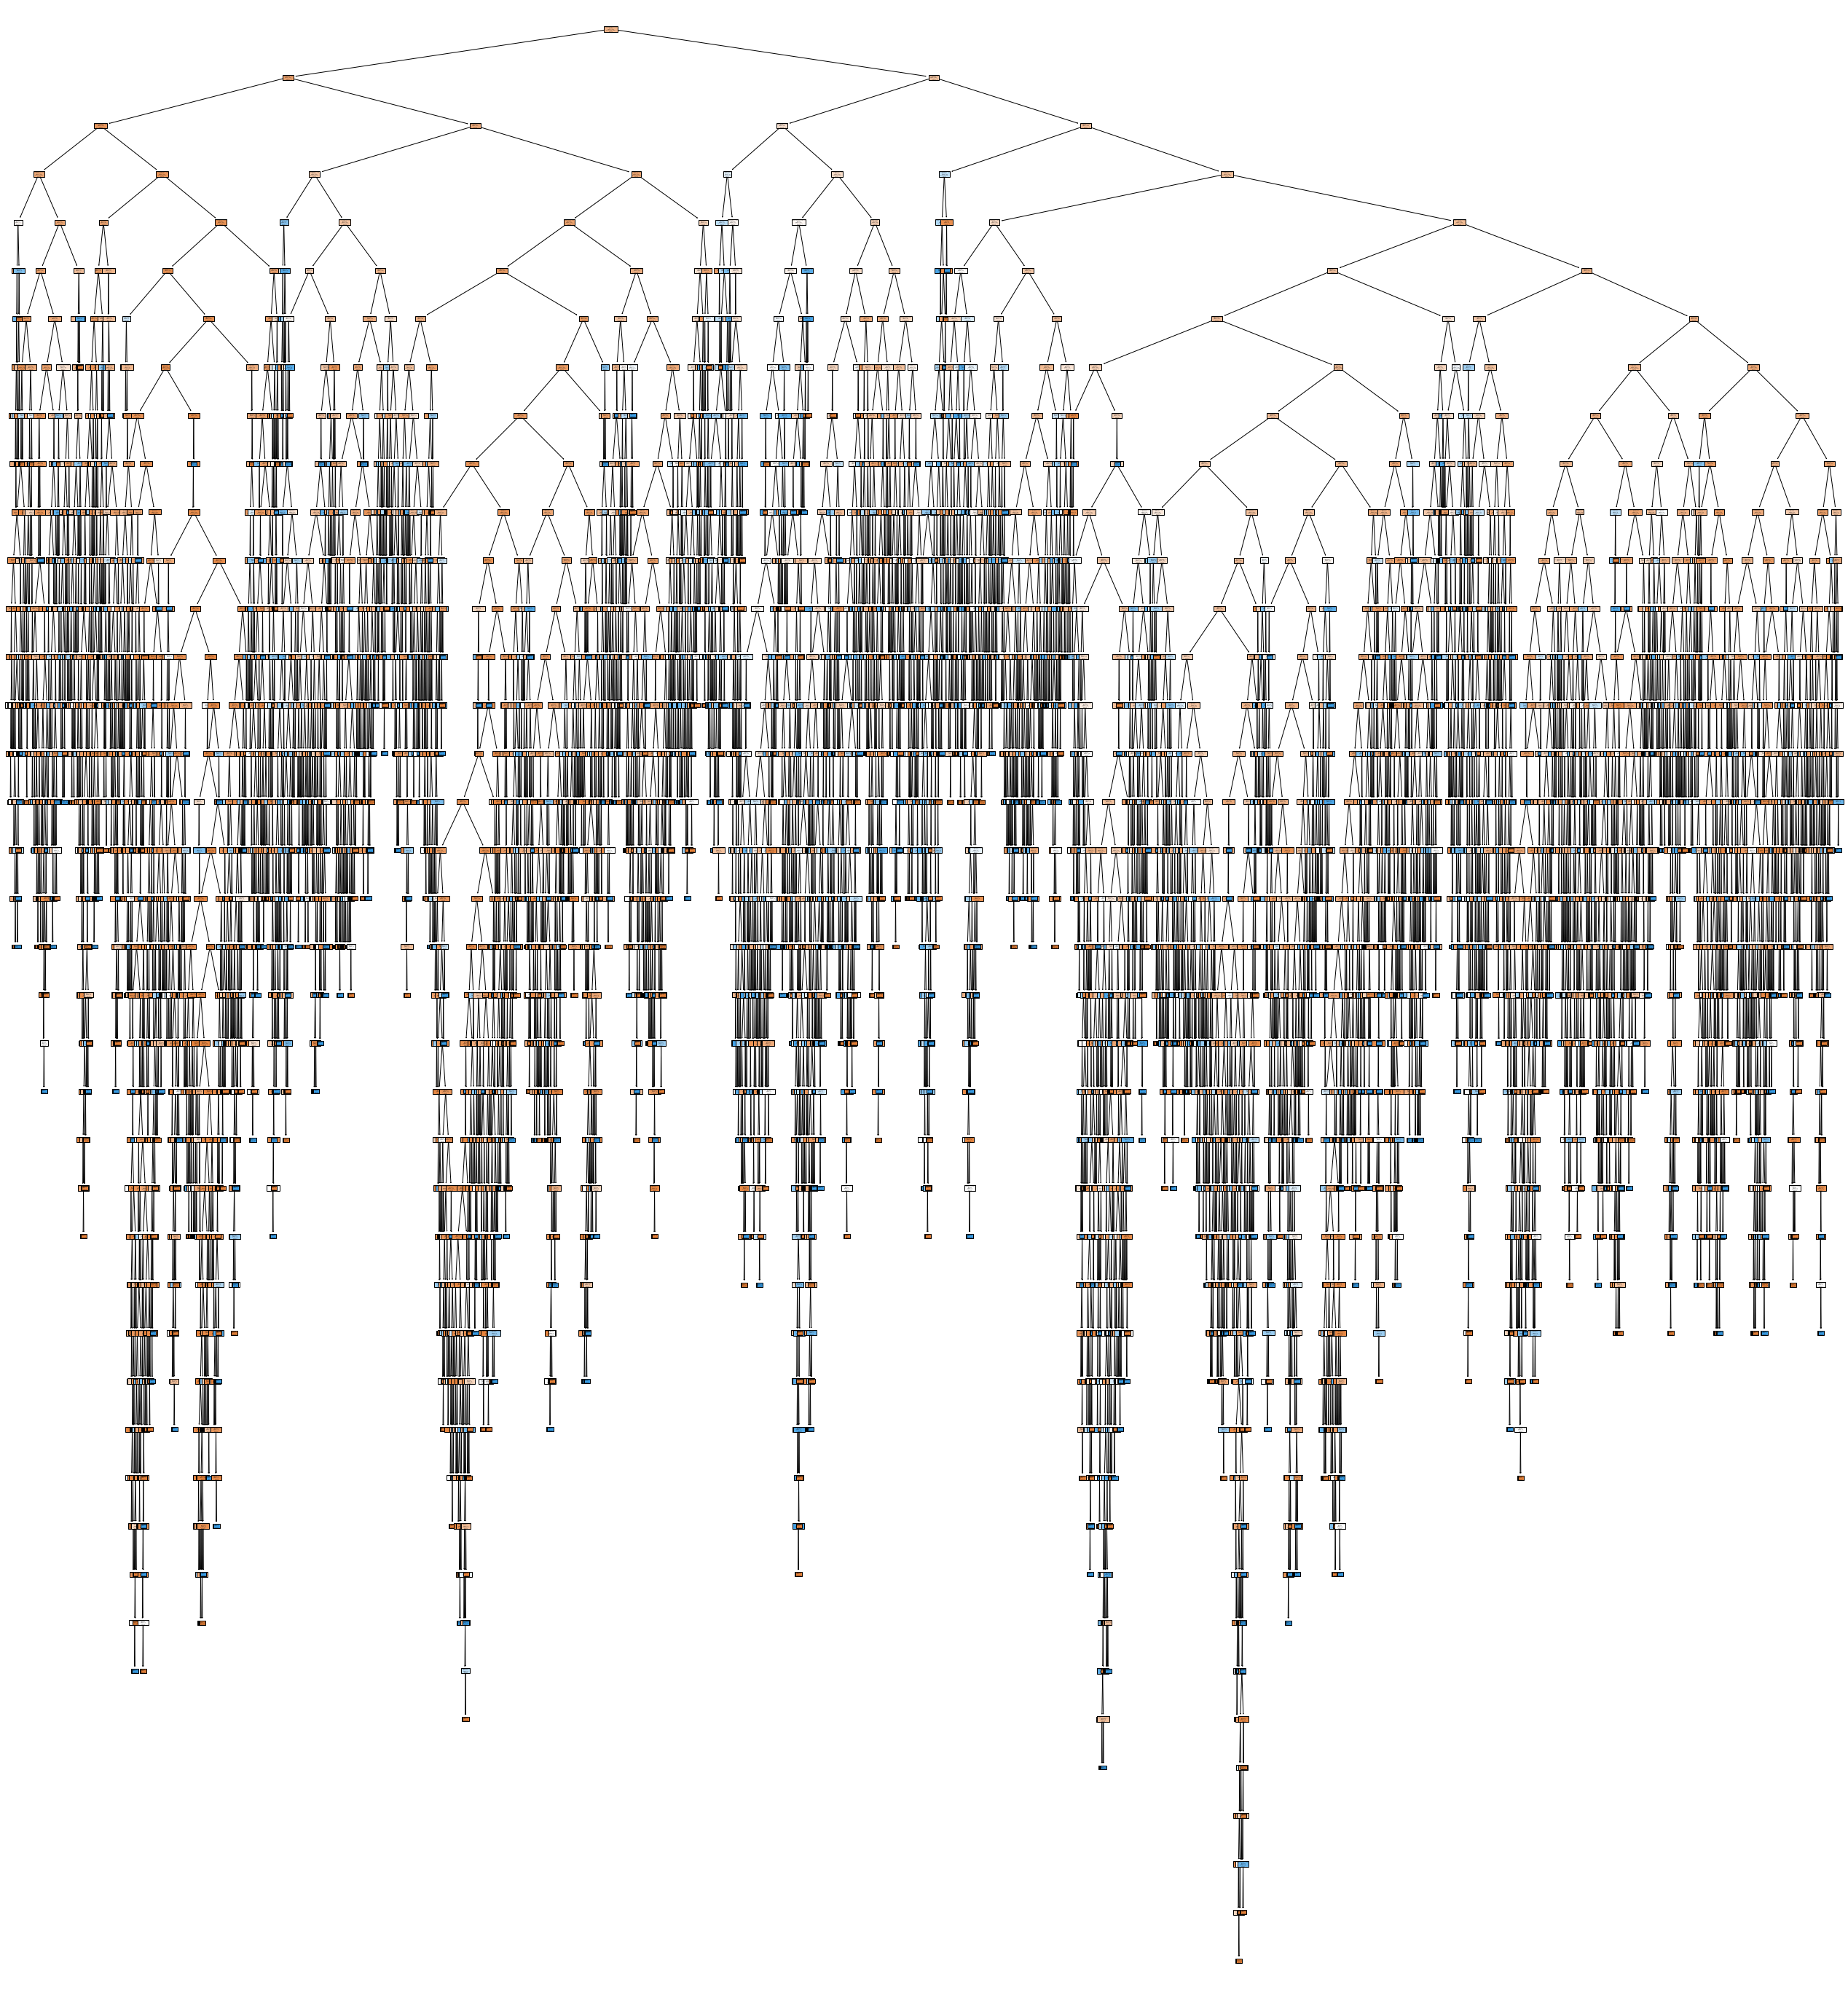

In [59]:
# No is mapped to 0
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(decision_tree,
                   feature_names=x_train.columns,  
                   class_names=["0","1"],
                   filled=True)

### Plot the confusion matrix.

In [60]:
# let 'y_pred_prob' be the predicted values of y
y_pred= decision_tree.predict(x_test)

# print the y_pred_prob
y_pred

array([0, 0, 0, ..., 0, 1, 1])

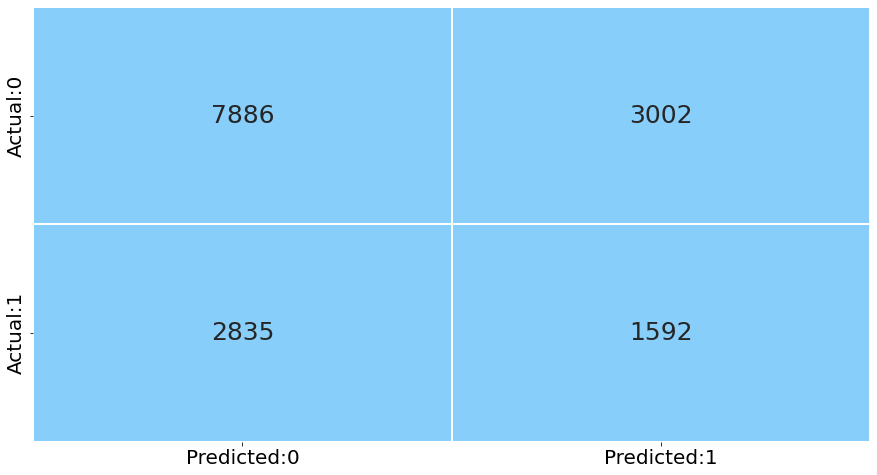

In [61]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

## Over-fitting in Decision Tree

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

**Calculate performance measures on the train set.**

In [62]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25448
           1       1.00      1.00      1.00     10284

    accuracy                           1.00     35732
   macro avg       1.00      1.00      1.00     35732
weighted avg       1.00      1.00      1.00     35732



**Calculate performance measures on the test set.**

In [63]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10888
           1       0.35      0.36      0.35      4427

    accuracy                           0.62     15315
   macro avg       0.54      0.54      0.54     15315
weighted avg       0.62      0.62      0.62     15315



In [64]:
#test as 62% train has 100% so, it is overfitted

**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

<a id="hyper"></a>
## 3.1 Tune the Hyperparameters using GridSearchCV (Decision Tree)

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the ` GridSearchCV()` and build the tree using the optimal values obtained using GridSearch method.

In [65]:
import time

In [66]:
%%time
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(5,10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [1,1.5,2,5],
                     'min_samples_leaf': [0.5,1,5],
                     'max_leaf_nodes': [5,8,9,10]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 

CPU times: total: 1min 51s
Wall time: 1min 51s


In [67]:
tree_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [68]:
%%time
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

CPU times: total: 46.9 ms
Wall time: 49.6 ms


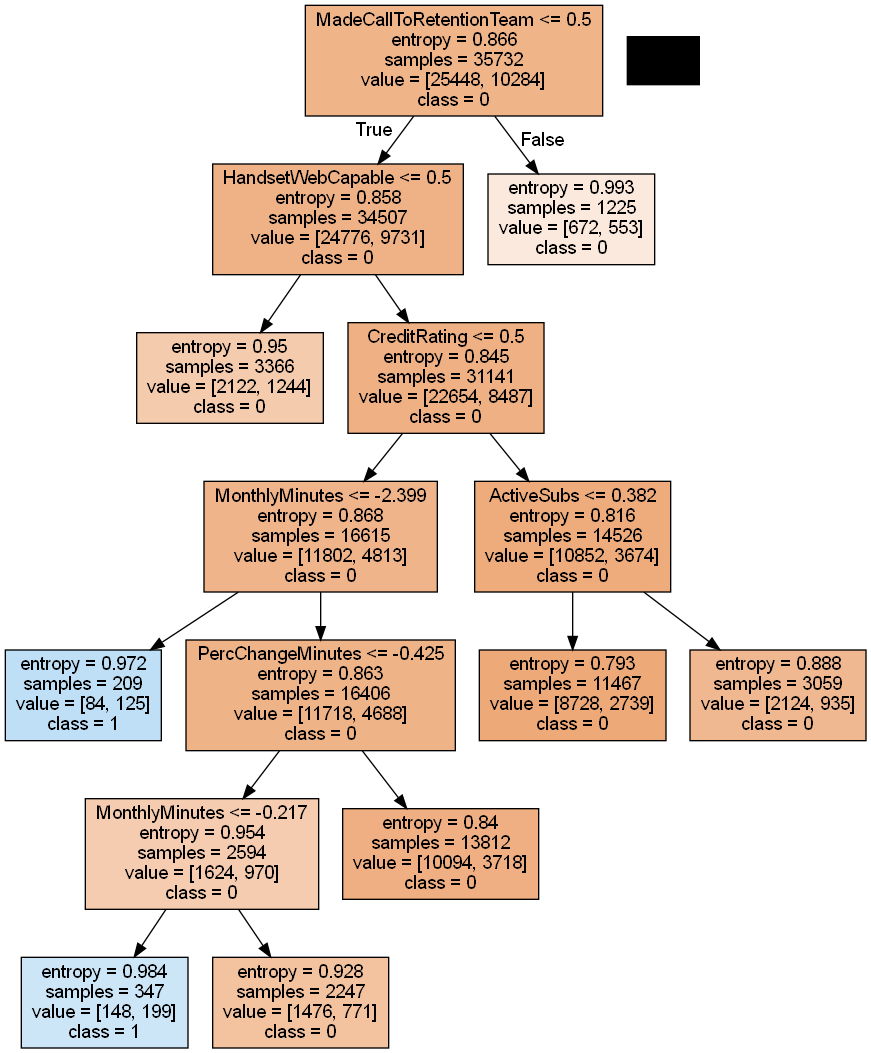

In [69]:
# save the column names in 'labels'
labels = x_train.columns

# export a decision tree in DOT format
# pass the 'dt_model' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels,filled=True, class_names = ["0","1"])  #filled gives color

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view

**Calculate performance measures on the train set.**

In [70]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83     25448
           1       0.58      0.03      0.06     10284

    accuracy                           0.71     35732
   macro avg       0.65      0.51      0.45     35732
weighted avg       0.68      0.71      0.61     35732



**Calculate performance measures on the test set.**

In [71]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     10888
           1       0.56      0.03      0.05      4427

    accuracy                           0.71     15315
   macro avg       0.64      0.51      0.44     15315
weighted avg       0.67      0.71      0.61     15315



**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [73]:
scores=cross_val_score(dt_model,x_train,y_train,scoring='recall')
np.mean(scores)

0.028975700322898562

### Confusion Matrix

In [74]:
y_pred=dt_model.predict(x_test)

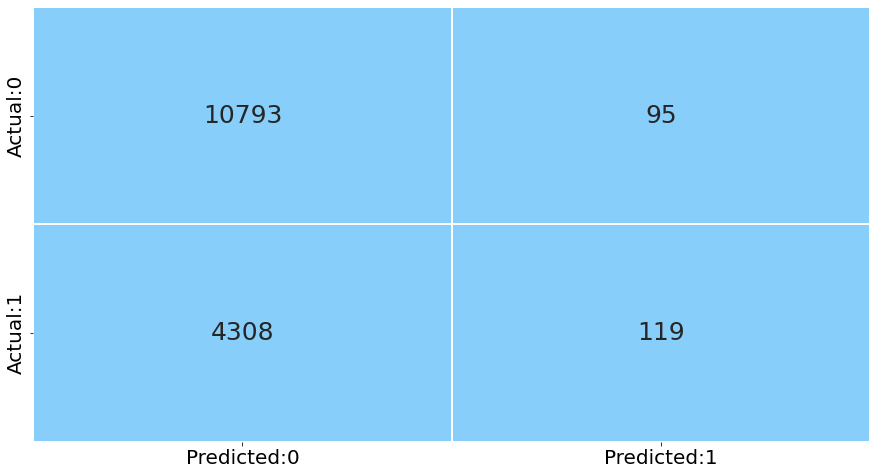

In [75]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

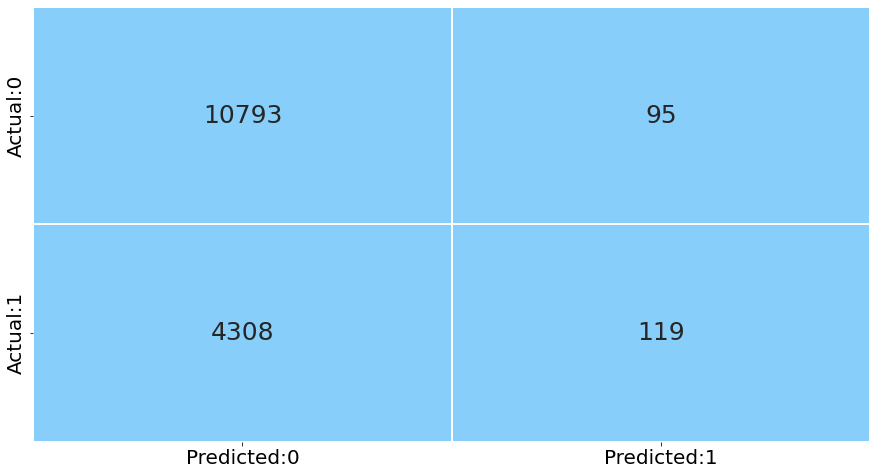

In [76]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [77]:
dt_model.score(x_test,y_test)

0.7125040809663729